In [1]:
import sys 
sys.path.append('..')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mstats

In [3]:
a_classified = pd.read_excel('../input/quotient_deviation_df_A_CLASSIFIED.xlsx')
b_classified = pd.read_excel('../input/quotient_deviation_df_B_CLASSIFIED_FIXED.xlsx')

In [4]:
c1 = a_classified[a_classified['Class 4']==0]
c2 = a_classified[a_classified['Class 4']==1]
c3 = a_classified[a_classified['Class 4']==2]
c4 = a_classified[a_classified['Class 4']==3]

In [ ]:
for i in range(1,16):
    plt.boxplot([c1[f'D{i}'], c2[f'D{i}'], c3[f'D{i}'], c4[f'D{i}']])
    plt.title(f'D{i}')
    plt.show()

In [ ]:
for i in range(1,16):
    plt.boxplot([c1[f'CWT{i}'], c2[f'CWT{i}'], c3[f'CWT{i}'], c4[f'CWT{i}']])
    plt.title(f'CWT{i}')
    plt.show()

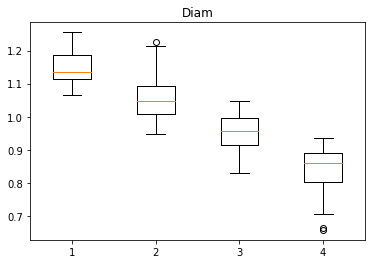

In [29]:
d1 = c1.iloc[:,1:16].mean(axis=1)
d2 = c2.iloc[:,1:16].mean(axis=1)
d3 = c3.iloc[:,1:16].mean(axis=1)
d4 = c4.iloc[:,1:16].mean(axis=1)

plt.boxplot([d1, d2, d3, d4])
plt.title('Diam')
plt.show()

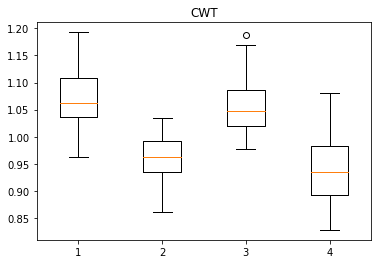

In [31]:
cwt1 = c1.iloc[:,16:31].mean(axis=1)
cwt2 = c2.iloc[:,16:31].mean(axis=1)
cwt3 = c3.iloc[:,16:31].mean(axis=1)
cwt4 = c4.iloc[:,16:31].mean(axis=1)

plt.boxplot([cwt1, cwt2, cwt3, cwt4])
plt.title('CWT')
plt.show()

In [15]:
mstats.kruskalwallis(list(c1[1:]['Area']), list(c2['Area']), list(c3['Area']), list(c4['Area']))

KruskalResult(statistic=11.597331123578272, pvalue=0.008897874419649555)

# Boxplot for PDSI and SPEI

In [8]:
PDSI = pd.read_excel('../output/to_send/005/scale_table.xlsx').dropna()

In [12]:
c1 = PDSI[PDSI['CLASS']==1]
c2 = PDSI[PDSI['CLASS']==2]
c3 = PDSI[PDSI['CLASS']==3]
c4 = PDSI[PDSI['CLASS']==4]

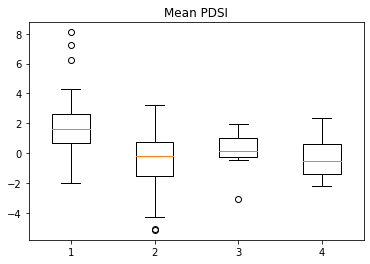

In [18]:
plt.boxplot([c1[1:]['Mean_PDSI'], c2['Mean_PDSI'], c3['Mean_PDSI'], c4['Mean_PDSI']])
plt.title('Mean PDSI')
plt.show()

In [21]:
mstats.kruskalwallis(list(c1['Mean_PDSI']), list(c2['Mean_PDSI']), list(c3['Mean_PDSI']), list(c4['Mean_PDSI']))

KruskalResult(statistic=27.58133710539056, pvalue=4.446350054472205e-06)

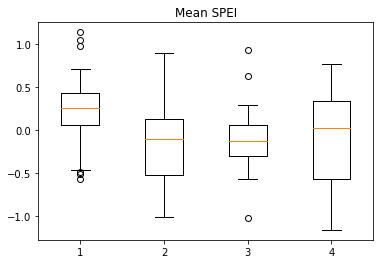

In [23]:
plt.boxplot([c1[1:]['Mean_SPEI'], c2['Mean_SPEI'], c3['Mean_SPEI'], c4['Mean_SPEI']])
plt.title('Mean SPEI')
plt.show()

In [22]:
mstats.kruskalwallis(list(c1[1:]['Mean_SPEI']), list(c2['Mean_SPEI']), list(c3['Mean_SPEI']), list(c4['Mean_SPEI']))

KruskalResult(statistic=14.359873634422286, pvalue=0.002454062672968883)

# Boxplot for AREA

In [11]:
scale_table = pd.read_excel('../output/to_send/005/scale_table.xlsx')

In [12]:
c1 = scale_table[scale_table['Class 4']==1]
c2 = scale_table[scale_table['Class 4']==2]
c3 = scale_table[scale_table['Class 4']==3]
c4 = scale_table[scale_table['Class 4']==4]

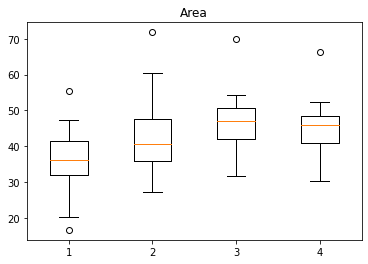

In [13]:
plt.boxplot([c1['Area'].dropna(), c2['Area'].dropna(), c3['Area'].dropna(), c4['Area'].dropna()])
plt.title('Area')
plt.show()

In [14]:
mstats.kruskalwallis(list(c1['Area'].dropna()), list(c2['Area'].dropna()), list(c3['Area'].dropna()), list(c4['Area'].dropna()))

KruskalResult(statistic=15.744654289731045, pvalue=0.0012791899288327525)

# Area Experiment

In [ ]:
areas = pd.read_excel('../output/Year_Areas_EXPERIMENT.xlsx')

In [13]:
c1 = areas[areas['Class']==0]
c2 = areas[areas['Class']==1]
c3 = areas[areas['Class']==2]
c4 = areas[areas['Class']==3]

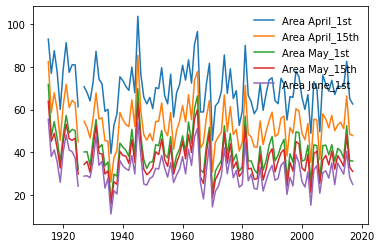

In [24]:

for column in areas.columns:
    if column in ['Year', 'Class']:
        continue
    plt.plot(areas['Year'], areas[column], label=column)
plt.legend(frameon=False)

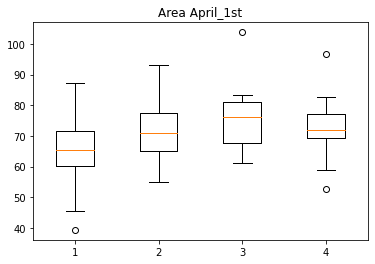

Area April_1st KruskalResult(statistic=12.215871993017856, pvalue=0.0066790982378027415)


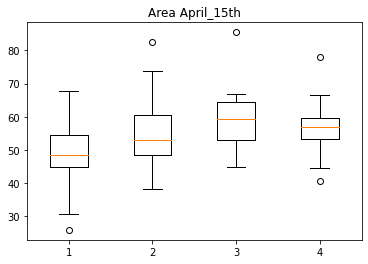

Area April_15th KruskalResult(statistic=15.121839451388894, pvalue=0.0017154340494602524)


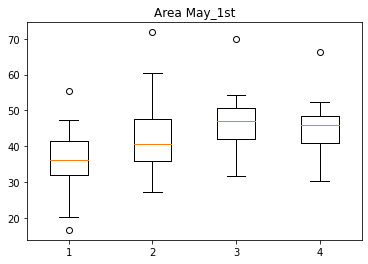

Area May_1st KruskalResult(statistic=15.744654289731045, pvalue=0.0012791899288327525)


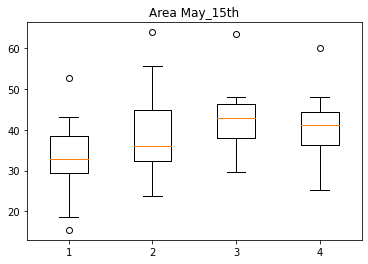

Area May_15th KruskalResult(statistic=14.861412967312162, pvalue=0.0019389938971517856)


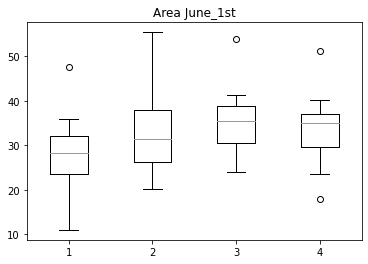

Area June_1st KruskalResult(statistic=11.982646025545876, pvalue=0.0074428449268475975)


In [17]:
from scipy.stats import mstats

for column in areas.columns:
    if column in ['Year', 'Class']:
        continue
    plt.boxplot([c1[1:][column], c2[column], c3[column], c4[column]])
    plt.title(column)
    plt.show()
    print(column, mstats.kruskalwallis(list(c1[1:][column]), list(c2[column]), list(c3[column]), list(c4[column])))

In [23]:

for column in areas.columns:
    if column in ['Year', 'Class']:
        continue
    stat, p = mstats.kruskalwallis(list(c1[1:][column]), list(c2[column]), list(c3[column]), list(c4[column]))
    print(f'{column}-Sept_30th: stat = {stat:.5f}, p-value = {p:.5f}')

Area April_1st-Sept_30th: stat = 12.21587, p-value = 0.00668
Area April_15th-Sept_30th: stat = 15.12184, p-value = 0.00172
Area May_1st-Sept_30th: stat = 15.74465, p-value = 0.00128
Area May_15th-Sept_30th: stat = 14.86141, p-value = 0.00194
Area June_1st-Sept_30th: stat = 11.98265, p-value = 0.00744
